In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from flaml import AutoML
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve

# Set random seed for reproducibility
np.random.seed(42)

<h3><b>Reading the datasets provided</b></h3>

In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')
original = pd.read_csv('Dataset/machine failure.csv')

<h3><b>Exploring the dataset</b></h3>

In [4]:
train.shape

(136429, 14)

In [5]:
test.shape

(90954, 13)

In [6]:
original.shape

(10000, 14)

In [7]:
train.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [8]:
test.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0  136429     L50896    L                302.3                    311.5   
1  136430     L53866    L                301.7                    311.0   
2  136431     L50498    L                301.3                    310.4   
3  136432     M21232    M                300.1                    309.6   
4  136433     M19751    M                303.4                    312.3   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  \
0                    1499         38.0               60    0    0    0    0   
1                    1713         28.8               17    0    0    0    0   
2                    1525         37.7               96    0    0    0    0   
3                    1479         47.6                5    0    0    0    0   
4                    1515         41.3              114    0    0    0    0   

   RNF  
0    0  
1    0  
2    0  
3    0  
4    0

In [9]:
original.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [10]:
train.describe().T

count          mean           std     min  \
id                       136429.0  68214.000000  39383.804275     0.0   
Air temperature [K]      136429.0    299.862776      1.862247   295.3   
Process temperature [K]  136429.0    309.941070      1.385173   305.8   
Rotational speed [rpm]   136429.0   1520.331110    138.736632  1181.0   
Torque [Nm]              136429.0     40.348643      8.502229     3.8   
Tool wear [min]          136429.0    104.408901     63.965040     0.0   
Machine failure          136429.0      0.015744      0.124486     0.0   
TWF                      136429.0      0.001554      0.039389     0.0   
HDF                      136429.0      0.005160      0.071649     0.0   
PWF                      136429.0      0.002397      0.048899     0.0   
OSF                      136429.0      0.003958      0.062789     0.0   
RNF                      136429.0      0.002258      0.047461     0.0   

                             25%      50%       75%       max  
id                       34107.0  68214.0  102321.0  136428.0  
Air temperature [K]        298.3    300.0     301.2     304.4  
Process temperature [K]    308.7    310.0     310.9     313.8  
Rotational speed [rpm]    1432.0   1493.0    1580.0    2886.0  
Torque [Nm]                 34.6     40.4      46.1      76.6  
Tool wear [min]             48.0    106.0     159.0     253.0  
Machine failure              0.0      0.0       0.0       1.0  
TWF                          0.0      0.0       0.0       1.0  
HDF                          0.0      0.0       0.0       1.0  
PWF                          0.0      0.0       0.0       1.0  
OSF                          0.0      0.0       0.0       1.0  
RNF                          0.0      0.0       0.0       1.0

In [11]:
test.describe().T

count           mean           std       min  \
id                       90954.0  181905.500000  26256.302529  136429.0   
Air temperature [K]      90954.0     299.859493      1.857562     295.3   
Process temperature [K]  90954.0     309.939375      1.385296     305.7   
Rotational speed [rpm]   90954.0    1520.528179    139.970419    1168.0   
Torque [Nm]              90954.0      40.335191      8.504683       3.8   
Tool wear [min]          90954.0     104.293962     63.871092       0.0   
TWF                      90954.0       0.001473      0.038355       0.0   
HDF                      90954.0       0.005343      0.072903       0.0   
PWF                      90954.0       0.002353      0.048449       0.0   
OSF                      90954.0       0.003870      0.062090       0.0   
RNF                      90954.0       0.002309      0.047995       0.0   

                               25%       50%        75%       max  
id                       159167.25  181905.5  204643.75  227382.0  
Air temperature [K]         298.30     300.0     301.20     304.4  
Process temperature [K]     308.70     310.0     310.90     313.8  
Rotational speed [rpm]     1432.00    1493.0    1579.00    2886.0  
Torque [Nm]                  34.60      40.5      46.20      76.6  
Tool wear [min]              48.00     106.0     158.00     253.0  
TWF                           0.00       0.0       0.00       1.0  
HDF                           0.00       0.0       0.00       1.0  
PWF                           0.00       0.0       0.00       1.0  
OSF                           0.00       0.0       0.00       1.0  
RNF                           0.00       0.0       0.00       1.0

In [12]:
original.describe().T

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Machine failure          10000.0     0.03390     0.180981     0.0     0.00   
TWF                      10000.0     0.00460     0.067671     0.0     0.00   
HDF                      10000.0     0.01150     0.106625     0.0     0.00   
PWF                      10000.0     0.00950     0.097009     0.0     0.00   
OSF                      10000.0     0.00980     0.098514     0.0     0.00   
RNF                      10000.0     0.00190     0.043550     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Machine failure             0.0     0.00      1.0  
TWF                         0.0     0.00      1.0  
HDF                         0.0     0.00      1.0  
PWF                         0.0     0.00      1.0  
OSF                         0.0     0.00      1.0  
RNF                         0.0     0.00      1.0

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [15]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

<h3><b>Identify and handle missing values in the dataset</b></h3>

In [16]:
# Counting the number of missing values in each column of the train dataset

missing_val = train.isnull().sum()
print(missing_val[missing_val>0])

Series([], dtype: int64)


In [17]:
# Counting the number of missing values in each column of the test dataset

missing_val = test.isnull().sum()
print(missing_val[missing_val>0])

Series([], dtype: int64)


In [18]:
# Counting the number of missing values in each column of the original dataset

missing_val = original.isnull().sum()
print(missing_val[missing_val>0])

Series([], dtype: int64)


<h3>Removing the 'id' and 'UDI' column from train and original dataset as they are unnecessary and uninformative</h3>

In [19]:
train.drop("id", axis=1, inplace=True)
original.drop("UDI", axis=1, inplace=True)

<h3><b>Rename the columns</b></h3>

In [20]:
# Display the current column names
print("Current column names:")
print(train.columns)

Current column names:
Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [21]:

# Create a dictionary to map old column names to new column names
column_name_mapping = {
    'Air temperature [K]': 'Air_temperature_K',
    'Process temperature [K]': 'Process_temperature_K',
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]':'Tool wear_min'
    # Add more mappings as needed
}

# Rename the columns using the mapping dictionary
train.rename(columns=column_name_mapping, inplace=True)

# Display the updated column names
print("\nUpdated column names:")
print(train.columns)


Updated column names:
Index(['Product ID', 'Type', 'Air_temperature_K', 'Process_temperature_K',
       'Rotational_speed_rpm', 'Torque_Nm', 'Tool wear_min', 'Machine failure',
       'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [22]:
# Rename the columns using the mapping dictionary
test.rename(columns=column_name_mapping, inplace=True)

# Display the updated column names
print("\nUpdated column names:")
print(test.columns)


Updated column names:
Index(['id', 'Product ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool wear_min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [23]:
# Rename the columns using the mapping dictionary
original.rename(columns=column_name_mapping, inplace=True)

# Display the updated column names
print("\nUpdated column names:")
print(original.columns)


Updated column names:
Index(['Product ID', 'Type', 'Air_temperature_K', 'Process_temperature_K',
       'Rotational_speed_rpm', 'Torque_Nm', 'Tool wear_min', 'Machine failure',
       'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


<h3><b>Check for and remove any duplicate rows in the dataset </b></h3>

In [24]:
# Identify duplicate rows based on all columns for train dataset
duplicate_rows = train.duplicated(keep=False)

# Filter and sort the duplicate rows
duplicate_df = train[duplicate_rows]
duplicate_df_sorted = duplicate_df.sort_values(by=list(train.columns))

# Display the sorted duplicate rows
print(duplicate_df_sorted)

       Product ID Type  Air_temperature_K  Process_temperature_K  \
4056       H29885    H              297.3                  308.8   
16194      H29885    H              297.3                  308.8   
62898      H30001    H              297.6                  309.5   
118324     H30001    H              297.6                  309.5   
56871      H30197    H              296.8                  307.9   
...           ...  ...                ...                    ...   
61399      M24767    M              298.6                  309.1   
1710       M24781    M              298.5                  308.7   
19913      M24781    M              298.5                  308.7   
19004      M24842    M              298.7                  308.4   
95614      M24842    M              298.7                  308.4   

        Rotational_speed_rpm  Torque_Nm  Tool wear_min  Machine failure  TWF  \
4056                    1419       42.4            104                0    0   
16194                  

In [25]:
# Remove duplicates from the dataset
train = train[~duplicate_rows]

# Optional: Reset the index if necessary
train = train.reset_index(drop=True)

In [26]:
# Identify duplicate rows based on all columns for original dataset
duplicate_rows = original.duplicated(keep=False)

# Filter and sort the duplicate rows
duplicate_df = original[duplicate_rows]
duplicate_df_sorted = duplicate_df.sort_values(by=list(original.columns))

# Display the sorted duplicate rows
print(duplicate_df_sorted)

Empty DataFrame
Columns: [Product ID, Type, Air_temperature_K, Process_temperature_K, Rotational_speed_rpm, Torque_Nm, Tool wear_min, Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []


<h3><b>Finding the number of unique values in the dataset</b></h3>

In [27]:
# Iterate over each column and print the number of unique values
for column in train.columns:
    unique_values = train[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'Product ID' has 9976 unique values.
Column 'Type' has 3 unique values.
Column 'Air_temperature_K' has 95 unique values.
Column 'Process_temperature_K' has 81 unique values.
Column 'Rotational_speed_rpm' has 952 unique values.
Column 'Torque_Nm' has 611 unique values.
Column 'Tool wear_min' has 246 unique values.
Column 'Machine failure' has 2 unique values.
Column 'TWF' has 2 unique values.
Column 'HDF' has 2 unique values.
Column 'PWF' has 2 unique values.
Column 'OSF' has 2 unique values.
Column 'RNF' has 2 unique values.


In [28]:
# Iterate over each column and print the number of unique values
for column in test.columns:
    unique_values = test[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'id' has 90954 unique values.
Column 'Product ID' has 9909 unique values.
Column 'Type' has 3 unique values.
Column 'Air_temperature_K' has 92 unique values.
Column 'Process_temperature_K' has 84 unique values.
Column 'Rotational_speed_rpm' has 946 unique values.
Column 'Torque_Nm' has 595 unique values.
Column 'Tool wear_min' has 246 unique values.
Column 'TWF' has 2 unique values.
Column 'HDF' has 2 unique values.
Column 'PWF' has 2 unique values.
Column 'OSF' has 2 unique values.
Column 'RNF' has 2 unique values.


In [29]:
# Iterate over each column and print the number of unique values
for column in original.columns:
    unique_values = original[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'Product ID' has 10000 unique values.
Column 'Type' has 3 unique values.
Column 'Air_temperature_K' has 93 unique values.
Column 'Process_temperature_K' has 82 unique values.
Column 'Rotational_speed_rpm' has 941 unique values.
Column 'Torque_Nm' has 577 unique values.
Column 'Tool wear_min' has 246 unique values.
Column 'Machine failure' has 2 unique values.
Column 'TWF' has 2 unique values.
Column 'HDF' has 2 unique values.
Column 'PWF' has 2 unique values.
Column 'OSF' has 2 unique values.
Column 'RNF' has 2 unique values.


<h3><b>Analysing the categorical column values with respect to target class</b></h3>

In [30]:
# Group the data by different columns and count the occurrences
grouped_data_type = train.groupby(['Type', 'Machine failure']).size().reset_index(name='Count')
grouped_data_twf = train.groupby(['TWF', 'Machine failure']).size().reset_index(name='Count')
grouped_data_hdf = train.groupby(['HDF', 'Machine failure']).size().reset_index(name='Count')
grouped_data_pwf = train.groupby(['PWF', 'Machine failure']).size().reset_index(name='Count')
grouped_data_osf = train.groupby(['OSF', 'Machine failure']).size().reset_index(name='Count')
grouped_data_rnf = train.groupby(['RNF', 'Machine failure']).size().reset_index(name='Count')

# Print the results
print("Grouped Data by Type and Machine failure:")
print(grouped_data_type)

print("\nGrouped Data by TWF and Machine failure:")
print(grouped_data_twf)

print("\nGrouped Data by HDF and Machine failure:")
print(grouped_data_hdf)

print("\nGrouped Data by PWF and Machine failure:")
print(grouped_data_pwf)

print("\nGrouped Data by OSF and Machine failure:")
print(grouped_data_osf)

print("\nGrouped Data by RNF and Machine failure:")
print(grouped_data_rnf)

Grouped Data by Type and Machine failure:
  Type  Machine failure  Count
0    H                0   8736
1    H                1    116
2    L                0  92176
3    L                1   1568
4    M                0  31403
5    M                1    432

Grouped Data by TWF and Machine failure:
   TWF  Machine failure   Count
0    0                0  132315
1    0                1    1911
2    1                1     205

Grouped Data by HDF and Machine failure:
   HDF  Machine failure   Count
0    0                0  132311
1    0                1    1421
2    1                0       4
3    1                1     695

Grouped Data by PWF and Machine failure:
   PWF  Machine failure   Count
0    0                0  132312
1    0                1    1803
2    1                0       3
3    1                1     313

Grouped Data by OSF and Machine failure:
   OSF  Machine failure   Count
0    0                0  132313
1    0                1    1591
2    1                0      

In [31]:
# Group the data by different columns and count the occurrences
grouped_data_type_original = original.groupby(['Type', 'Machine failure']).size().reset_index(name='Count')
grouped_data_twf_original = original.groupby(['TWF', 'Machine failure']).size().reset_index(name='Count')
grouped_data_hdf_original = original.groupby(['HDF', 'Machine failure']).size().reset_index(name='Count')
grouped_data_pwf_original = original.groupby(['PWF', 'Machine failure']).size().reset_index(name='Count')
grouped_data_osf_original = original.groupby(['OSF', 'Machine failure']).size().reset_index(name='Count')
grouped_data_rnf_original = original.groupby(['RNF', 'Machine failure']).size().reset_index(name='Count')

# Print the results
print("Grouped Data by Type and Machine failure:")
print(grouped_data_type_original)

print("\nGrouped Data by TWF and Machine failure:")
print(grouped_data_twf_original)

print("\nGrouped Data by HDF and Machine failure:")
print(grouped_data_hdf_original)

print("\nGrouped Data by PWF and Machine failure:")
print(grouped_data_pwf_original)

print("\nGrouped Data by OSF and Machine failure:")
print(grouped_data_osf_original)

print("\nGrouped Data by RNF and Machine failure:")
print(grouped_data_rnf_original)

Grouped Data by Type and Machine failure:
  Type  Machine failure  Count
0    H                0    982
1    H                1     21
2    L                0   5765
3    L                1    235
4    M                0   2914
5    M                1     83

Grouped Data by TWF and Machine failure:
   TWF  Machine failure  Count
0    0                0   9661
1    0                1    293
2    1                1     46

Grouped Data by HDF and Machine failure:
   HDF  Machine failure  Count
0    0                0   9661
1    0                1    224
2    1                1    115

Grouped Data by PWF and Machine failure:
   PWF  Machine failure  Count
0    0                0   9661
1    0                1    244
2    1                1     95

Grouped Data by OSF and Machine failure:
   OSF  Machine failure  Count
0    0                0   9661
1    0                1    241
2    1                1     98

Grouped Data by RNF and Machine failure:
   RNF  Machine failure  Count
0   

<h3><b>Plotting the categorical columns</b></h3>

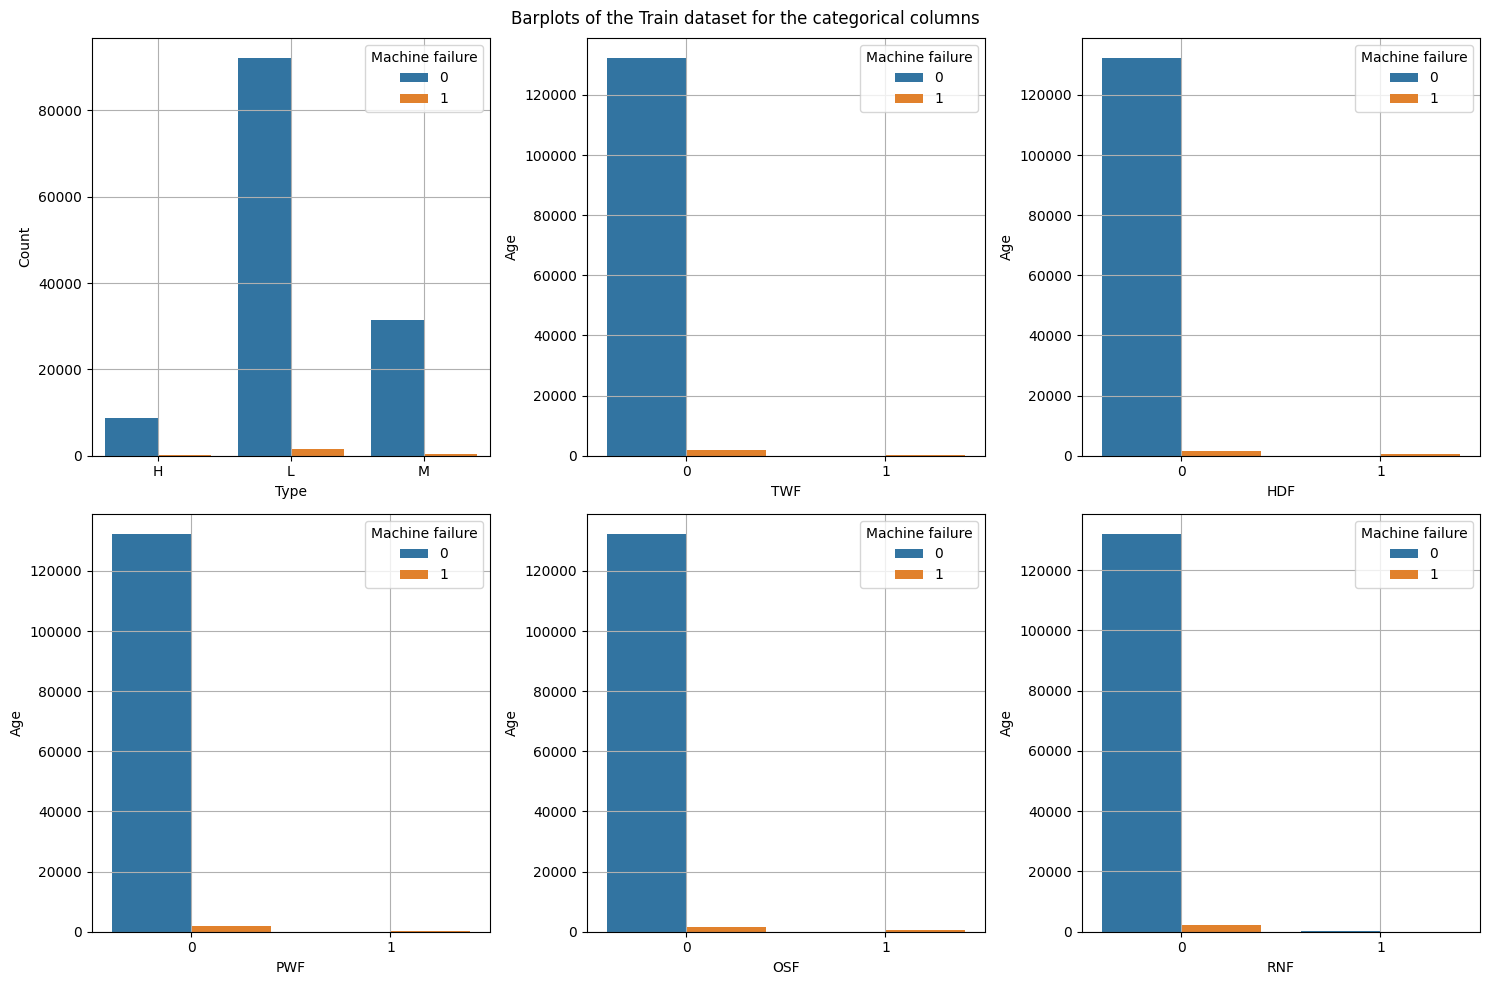

In [32]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Scatterplot for Length
sns.barplot(data=grouped_data_type, x='Type', y='Count', hue='Machine failure', ax=axes[0, 0])
axes[0, 0].set_xlabel('Type')
axes[0, 0].set_ylabel('Count')

# Scatterplot for Weight
sns.barplot(data=grouped_data_twf, x='TWF', y='Count', hue='Machine failure', ax=axes[0, 1])
axes[0, 1].set_xlabel('TWF')
axes[0, 1].set_ylabel('Age')

# Scatterplot for Height
sns.barplot(data=grouped_data_hdf, x='HDF', y='Count', hue='Machine failure', ax=axes[0, 2])
axes[0, 2].set_xlabel('HDF')
axes[0, 2].set_ylabel('Age')

# Scatterplot for Viscera weight
sns.barplot(data=grouped_data_pwf, x='PWF', y='Count', hue='Machine failure', ax=axes[1, 0])
axes[1, 0].set_xlabel('PWF')
axes[1, 0].set_ylabel('Age')

# Scatterplot for Shucked weight
sns.barplot(data=grouped_data_osf, x='OSF', y='Count', hue='Machine failure', ax=axes[1, 1])
axes[1, 1].set_xlabel('OSF')
axes[1, 1].set_ylabel('Age')

# Scatterplot for Shell weight
sns.barplot(data=grouped_data_rnf, x='RNF', y='Count', hue='Machine failure', ax=axes[1, 2])
axes[1, 2].set_xlabel('RNF')
axes[1, 2].set_ylabel('Age')

# Add overall title
fig.suptitle('Barplots of the Train dataset for the categorical columns')

# Add gridlines to all subplots
for ax in axes.flat:
    ax.grid(True)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

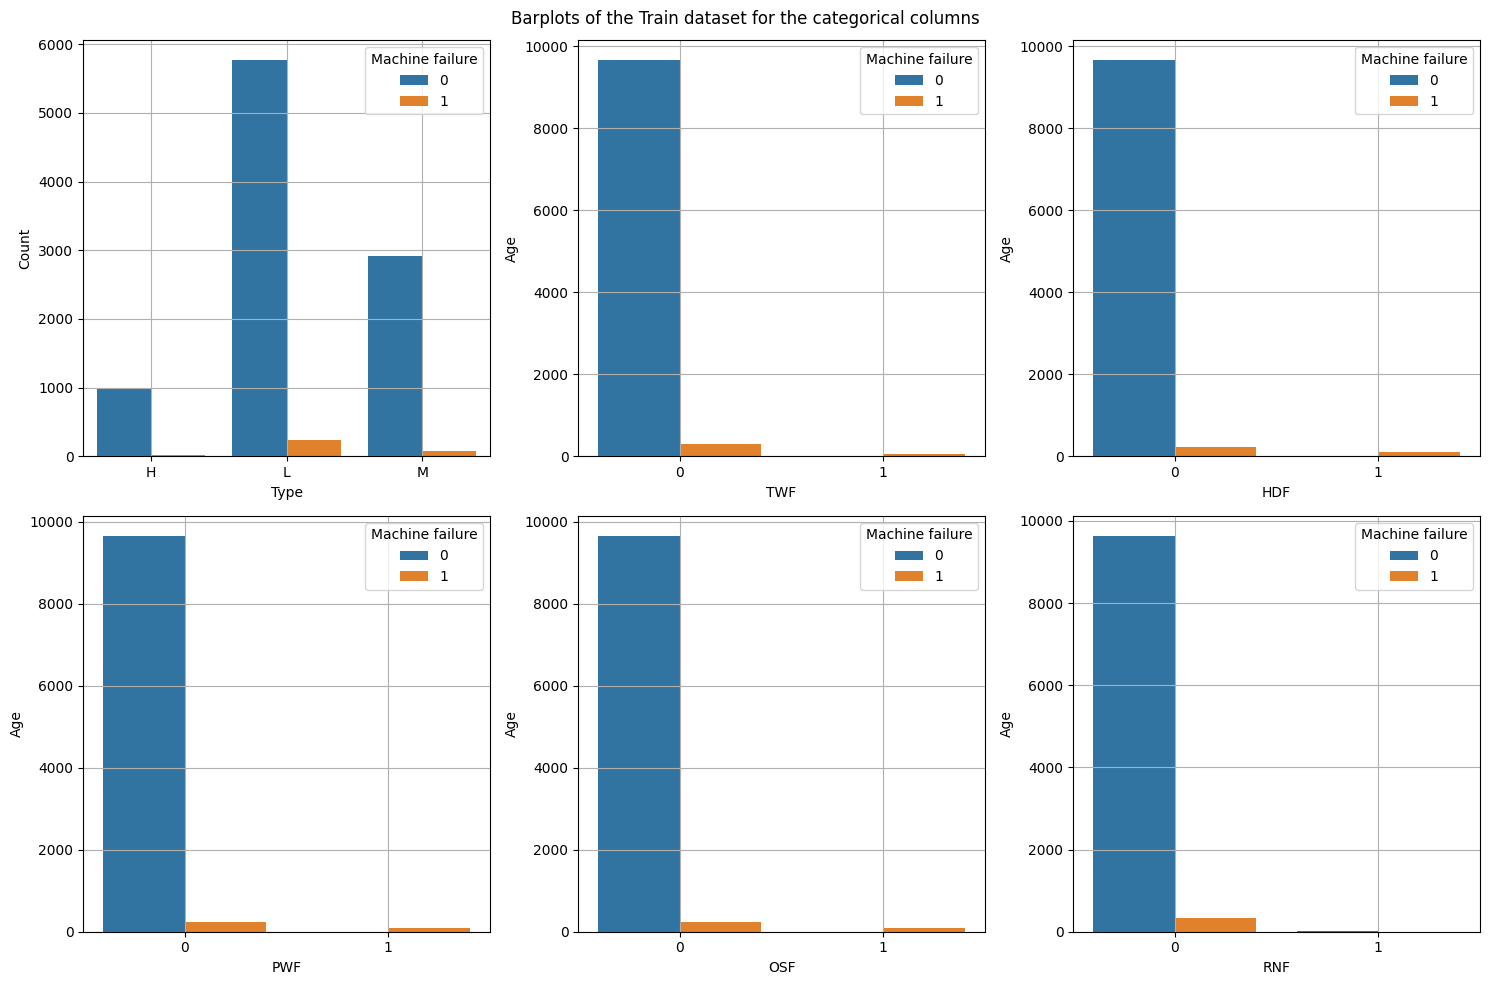

In [33]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Scatterplot for Length
sns.barplot(data=grouped_data_type_original, x='Type', y='Count', hue='Machine failure', ax=axes[0, 0])
axes[0, 0].set_xlabel('Type')
axes[0, 0].set_ylabel('Count')

# Scatterplot for Weight
sns.barplot(data=grouped_data_twf_original, x='TWF', y='Count', hue='Machine failure', ax=axes[0, 1])
axes[0, 1].set_xlabel('TWF')
axes[0, 1].set_ylabel('Age')

# Scatterplot for Height
sns.barplot(data=grouped_data_hdf_original, x='HDF', y='Count', hue='Machine failure', ax=axes[0, 2])
axes[0, 2].set_xlabel('HDF')
axes[0, 2].set_ylabel('Age')

# Scatterplot for Viscera weight
sns.barplot(data=grouped_data_pwf_original, x='PWF', y='Count', hue='Machine failure', ax=axes[1, 0])
axes[1, 0].set_xlabel('PWF')
axes[1, 0].set_ylabel('Age')

# Scatterplot for Shucked weight
sns.barplot(data=grouped_data_osf_original, x='OSF', y='Count', hue='Machine failure', ax=axes[1, 1])
axes[1, 1].set_xlabel('OSF')
axes[1, 1].set_ylabel('Age')

# Scatterplot for Shell weight
sns.barplot(data=grouped_data_rnf_original, x='RNF', y='Count', hue='Machine failure', ax=axes[1, 2])
axes[1, 2].set_xlabel('RNF')
axes[1, 2].set_ylabel('Age')

# Add overall title
fig.suptitle('Barplots of the Train dataset for the categorical columns')

# Add gridlines to all subplots
for ax in axes.flat:
    ax.grid(True)

# Adjust the spacing between subplots
fig.tight_layout()

<h3><b>Plotting the Numeric columns</b></h3>

Text(0.5, 0.98, 'Pairplots of the Train dataset for the numerical columns')

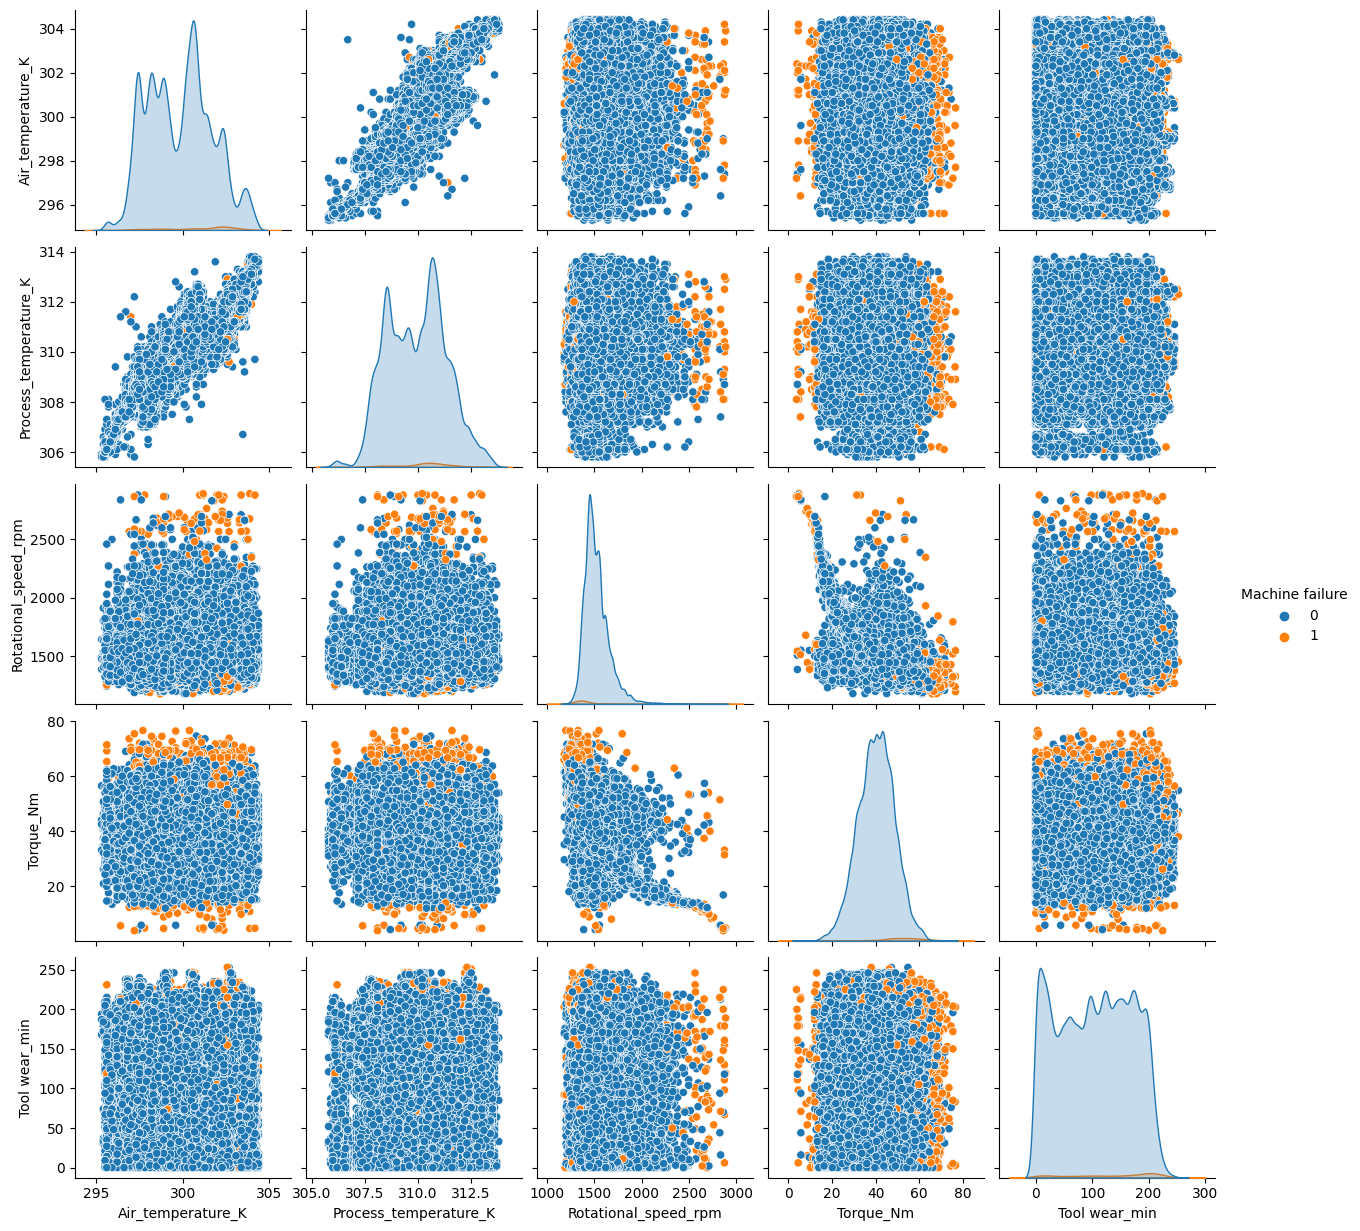

In [34]:
numeric_features = ['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool wear_min', 'Machine failure']

numeric_df1 = train[numeric_features]

sns.pairplot(numeric_df1, hue='Machine failure')

# Add overall title
fig.suptitle('Pairplots of the Train dataset for the numerical columns')

Text(0.5, 0.98, 'Pairplots of the Train dataset for the numerical columns')

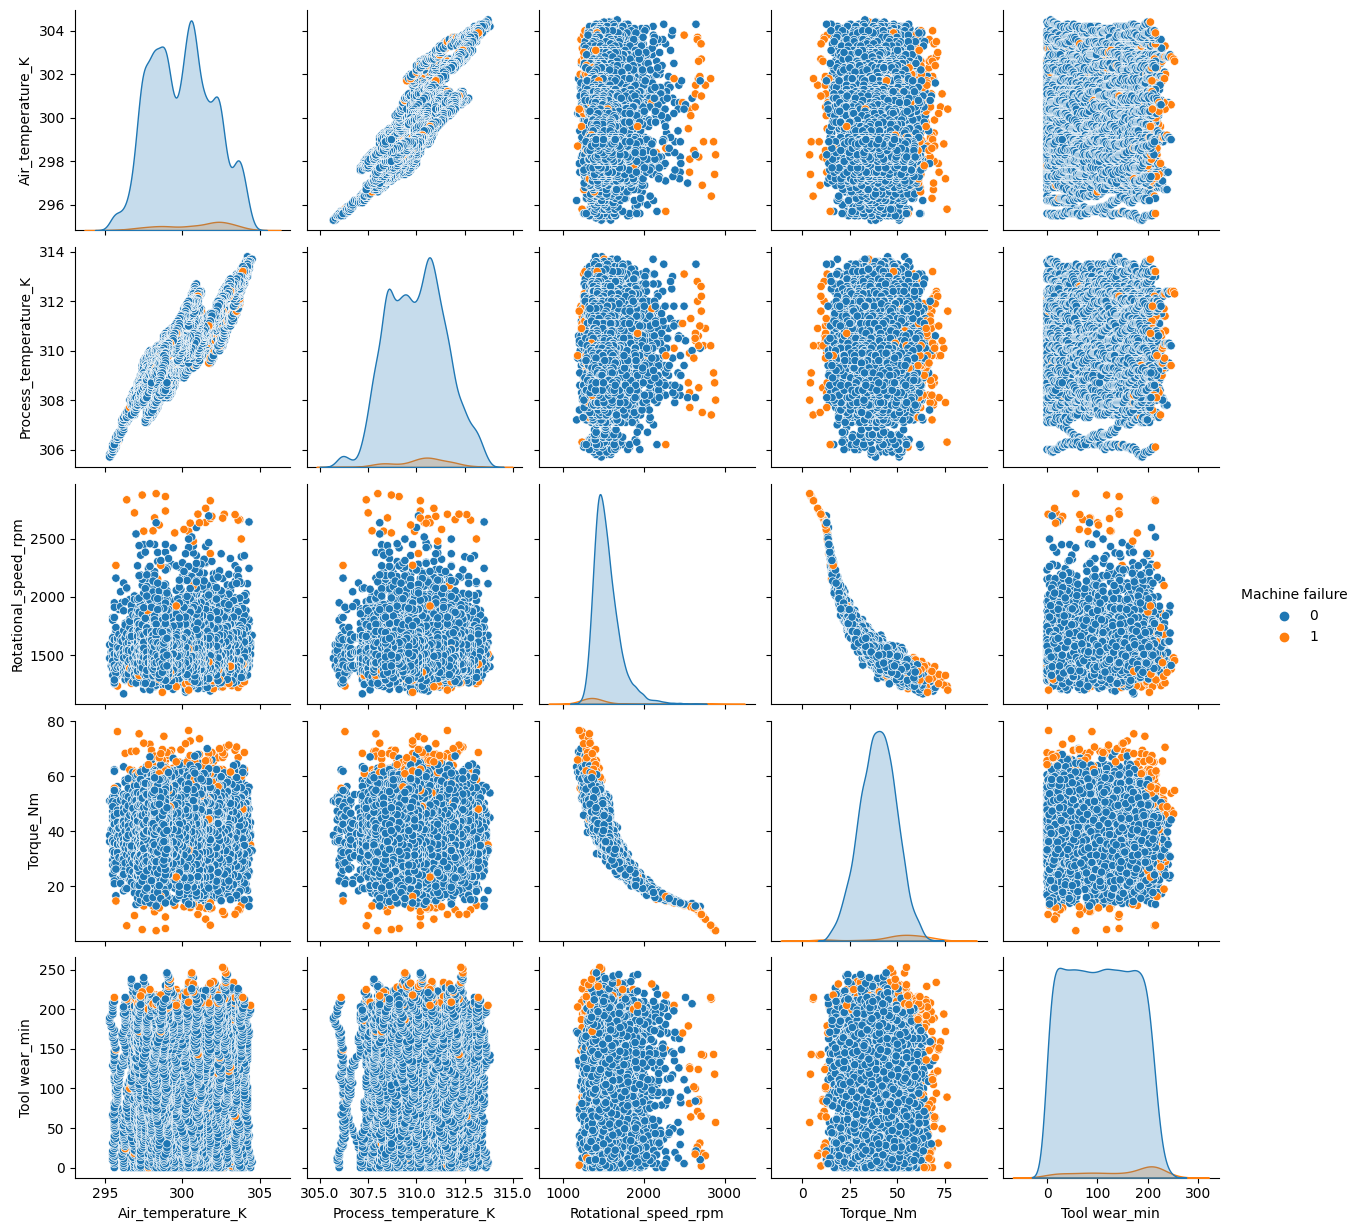

In [35]:
numeric_df2 = original[numeric_features]

sns.pairplot(numeric_df2, hue='Machine failure')

# Add overall title
fig.suptitle('Pairplots of the Train dataset for the numerical columns')

<h3><b>Comparing train and test dataset</b></h3>

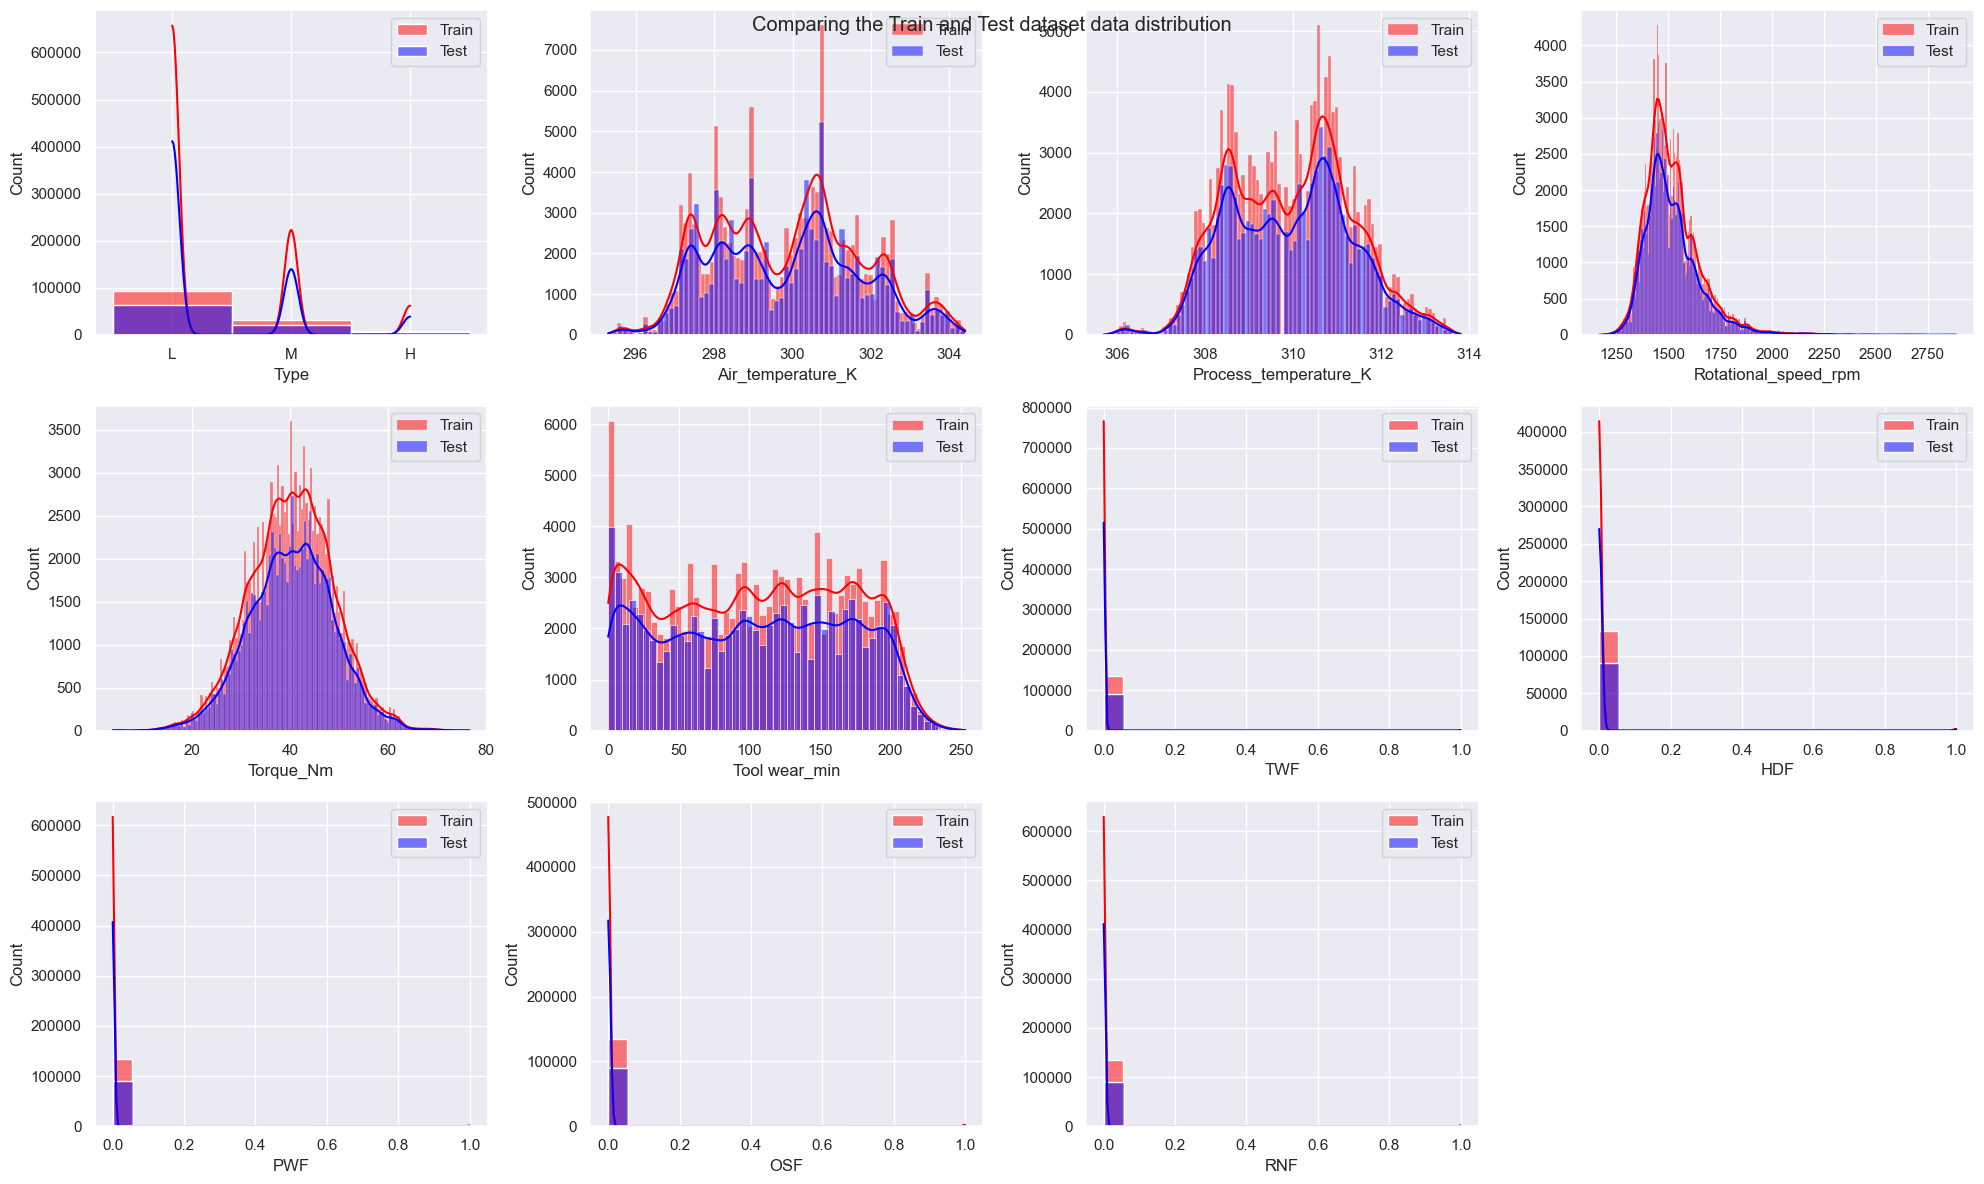

In [36]:
sns.set(style='darkgrid')

train_features = train.drop(columns=["Product ID","Machine failure"], axis=1)

# Set up the figure and axes
fig, axes = plt.subplots(3, 4, figsize=(20, 12))

# Flatten the axes for ease of iteration
axes = axes.flatten()

for i, feature in enumerate(train_features.columns):
    sns.histplot(data=train_features, x=feature, kde=True, color='Red', ax=axes[i], label='Train')
    sns.histplot(data=test, x=feature, kde=True, color='Blue', ax=axes[i], label='Test')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend()
 
axes[-1].remove()

fig.tight_layout()

# Add overall title
fig.suptitle('Comparing the Train and Test dataset data distribution')

plt.show()

<h3><b>Reordering the column</b></h3>

In [37]:
# Reorder the columns
column_order = [col for col in train.columns if col != 'Machine failure'] + ['Machine failure']
train = train[column_order]

train.head()

Product ID Type  Air_temperature_K  Process_temperature_K  \
0     L50096    L              300.6                  309.6   
1     M20343    M              302.6                  312.1   
2     L49454    L              299.3                  308.5   
3     L53355    L              301.0                  310.9   
4     M24050    M              298.0                  309.0   

   Rotational_speed_rpm  Torque_Nm  Tool wear_min  TWF  HDF  PWF  OSF  RNF  \
0                  1596       36.1            140    0    0    0    0    0   
1                  1759       29.1            200    0    0    0    0    0   
2                  1805       26.5             25    0    0    0    0    0   
3                  1524       44.3            197    0    0    0    0    0   
4                  1641       35.4             34    0    0    0    0    0   

   Machine failure  
0                0  
1                0  
2                0  
3                0  
4                0

In [38]:
# Reorder the columns
column_order = [col for col in original.columns if col != 'Machine failure'] + ['Machine failure']
original = original[column_order]

original.tail()

Product ID Type  Air_temperature_K  Process_temperature_K  \
9995     M24855    M              298.8                  308.4   
9996     H39410    H              298.9                  308.4   
9997     M24857    M              299.0                  308.6   
9998     H39412    H              299.0                  308.7   
9999     M24859    M              299.0                  308.7   

      Rotational_speed_rpm  Torque_Nm  Tool wear_min  TWF  HDF  PWF  OSF  RNF  \
9995                  1604       29.5             14    0    0    0    0    0   
9996                  1632       31.8             17    0    0    0    0    0   
9997                  1645       33.4             22    0    0    0    0    0   
9998                  1408       48.5             25    0    0    0    0    0   
9999                  1500       40.2             30    0    0    0    0    0   

      Machine failure  
9995                0  
9996                0  
9997                0  
9998                0  
9999                0

<h3><b>Converting the categorical columns to numerical values</b></h3>

In [39]:
categories = ['L', 'M', 'H']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the categories list
label_encoder.fit(categories)

# Transform the labels column in the training dataset
train["Type"] = label_encoder.transform(train[["Type"]])

train.head()

Product ID  Type  Air_temperature_K  Process_temperature_K  \
0     L50096     1              300.6                  309.6   
1     M20343     2              302.6                  312.1   
2     L49454     1              299.3                  308.5   
3     L53355     1              301.0                  310.9   
4     M24050     2              298.0                  309.0   

   Rotational_speed_rpm  Torque_Nm  Tool wear_min  TWF  HDF  PWF  OSF  RNF  \
0                  1596       36.1            140    0    0    0    0    0   
1                  1759       29.1            200    0    0    0    0    0   
2                  1805       26.5             25    0    0    0    0    0   
3                  1524       44.3            197    0    0    0    0    0   
4                  1641       35.4             34    0    0    0    0    0   

   Machine failure  
0                0  
1                0  
2                0  
3                0  
4                0

In [40]:
# Transform the labels column in the training dataset
original["Type"] = label_encoder.transform(original[["Type"]])

original.head()

Product ID  Type  Air_temperature_K  Process_temperature_K  \
0     M14860     2              298.1                  308.6   
1     L47181     1              298.2                  308.7   
2     L47182     1              298.1                  308.5   
3     L47183     1              298.2                  308.6   
4     L47184     1              298.2                  308.7   

   Rotational_speed_rpm  Torque_Nm  Tool wear_min  TWF  HDF  PWF  OSF  RNF  \
0                  1551       42.8              0    0    0    0    0    0   
1                  1408       46.3              3    0    0    0    0    0   
2                  1498       49.4              5    0    0    0    0    0   
3                  1433       39.5              7    0    0    0    0    0   
4                  1408       40.0              9    0    0    0    0    0   

   Machine failure  
0                0  
1                0  
2                0  
3                0  
4                0

In [41]:
# Transform the labels column in the training dataset
test["Type"] = label_encoder.transform(test[["Type"]])

test.head()

id Product ID  Type  Air_temperature_K  Process_temperature_K  \
0  136429     L50896     1              302.3                  311.5   
1  136430     L53866     1              301.7                  311.0   
2  136431     L50498     1              301.3                  310.4   
3  136432     M21232     2              300.1                  309.6   
4  136433     M19751     2              303.4                  312.3   

   Rotational_speed_rpm  Torque_Nm  Tool wear_min  TWF  HDF  PWF  OSF  RNF  
0                  1499       38.0             60    0    0    0    0    0  
1                  1713       28.8             17    0    0    0    0    0  
2                  1525       37.7             96    0    0    0    0    0  
3                  1479       47.6              5    0    0    0    0    0  
4                  1515       41.3            114    0    0    0    0    0

In [42]:
X = train.drop(columns=['Product ID','Machine failure'], axis=1)
y = train["Machine failure"]

In [43]:
# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [44]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the target variable if applicable
pca_df['target'] = train['Machine failure']  # Adjust the column name if necessary

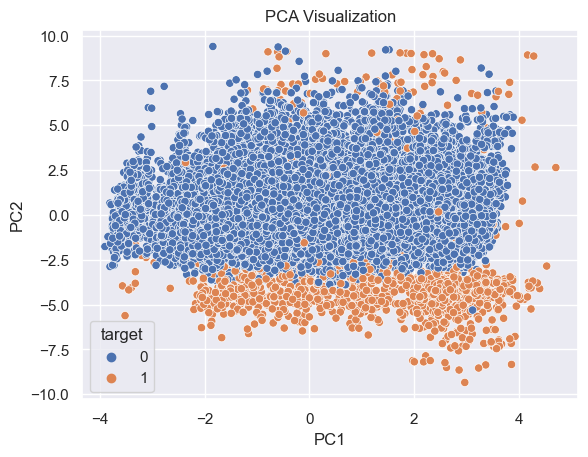

In [45]:
# Visualize the PCA using Seaborn
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df)
plt.title('PCA Visualization')
plt.show()

<h3><b>Checking the Correlation among the dataset features and target variable</b><h3>

In [46]:
correlation_matrix = train.corr(numeric_only=True)

target_correlation = correlation_matrix['Machine failure']

print(target_correlation)

Type                    -0.005230
Air_temperature_K        0.068533
Process_temperature_K    0.031485
Rotational_speed_rpm    -0.061839
Torque_Nm                0.146863
Tool wear_min            0.056038
TWF                      0.309033
HDF                      0.568375
PWF                      0.380139
OSF                      0.494171
RNF                      0.001529
Machine failure          1.000000
Name: Machine failure, dtype: float64


In [47]:
# Calculate Pearson correlation
pearson_corr = train.corr(method='pearson', numeric_only=True)

# Create a mask to hide the upper triangle
pearson_mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

# Calculate Spearman correlation
spearman_corr = train.corr(method='spearman', numeric_only=True)

# Create a mask to hide the upper triangle
spearman_mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

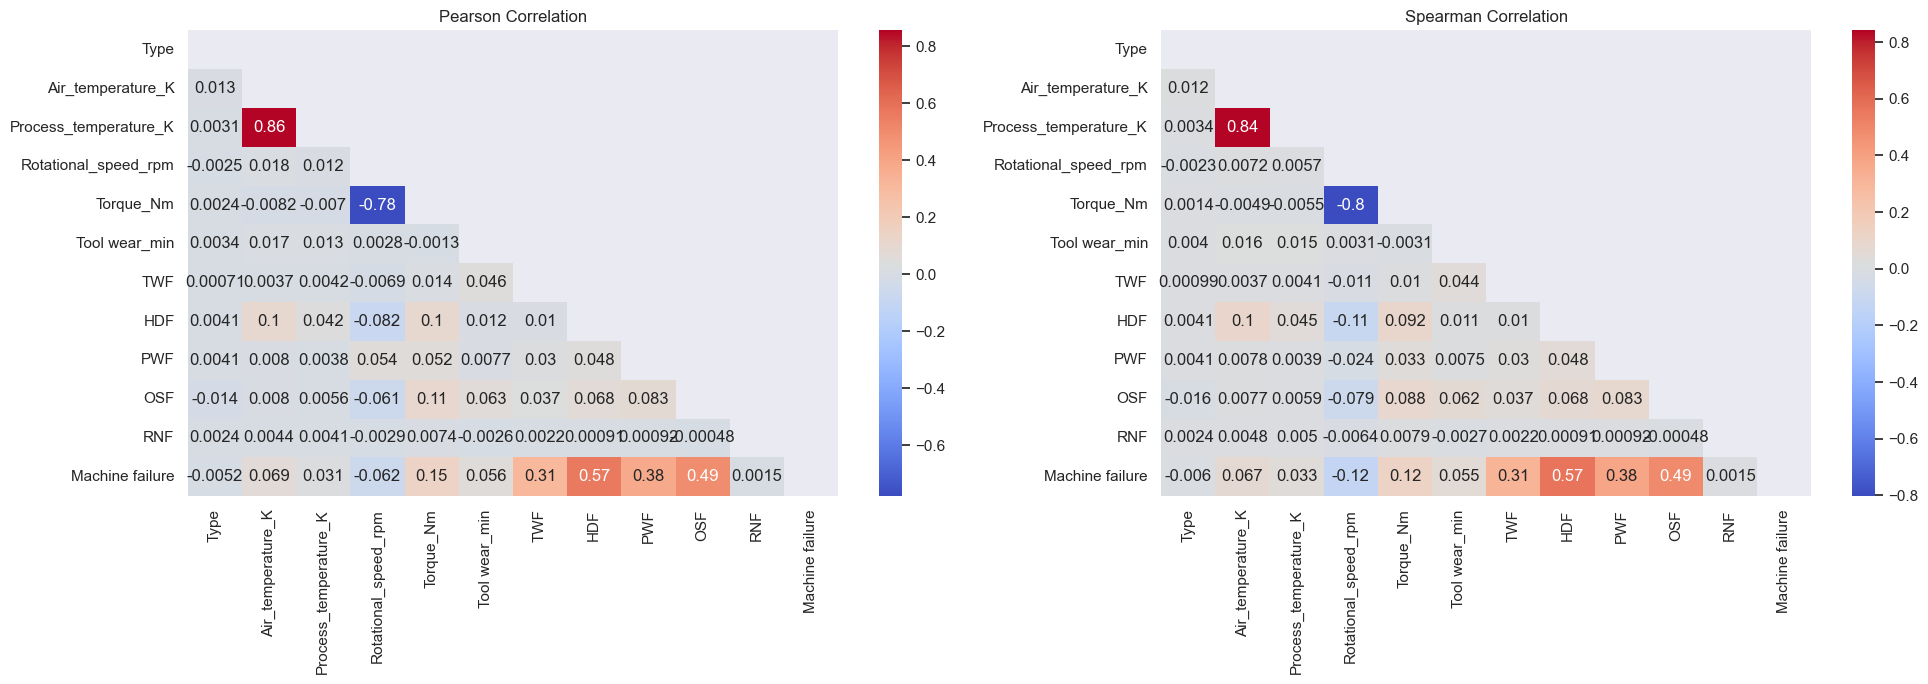

In [48]:
# Create a figure with two subplots in a row
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plot Pearson correlation heatmap
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', mask=pearson_mask, ax=axes[0])
axes[0].set_title('Pearson Correlation')

# Plot Spearman correlation heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', mask=spearman_mask, ax=axes[1])
axes[1].set_title('Spearman Correlation')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

<h3><b>Combining the train and the original dataset for better model performance</b></h3>

In [49]:
combined_df = pd.concat([train, original], axis=0)

<h3><b>Feature Selection</b></h3>

In [50]:
X = combined_df.drop(columns=["Machine failure", "Product ID"], axis=1)
Y = combined_df["Machine failure"]

# Print the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (144431, 11)
Shape of Y: (144431,)


<h3><b>Setting up model hyperparameters</b></h3>

In [51]:
# Split the dataset into training and testing subsets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an AutoML object
automl = AutoML()

# Specify the search space for FLAML
settings = {
    "time_budget":2000,  # Maximum time in seconds for FLAML to search for the best model
    "metric": 'roc_auc',  # Metric to optimize (e.g., accuracy, roc_auc, log_loss)
    "task": 'classification',  # Type of task (classification or regression)
    #"estimator_list":['lgbm', 'xgboost', 'rf', 'catboost', 'extra_tree'], # A list of machine learning models to consider during the search
    "split_type": 'auto', #The type of data splitting strategy to use during training
    "n_jobs": -1, #Number of parallel jobs to run
    "eval_method": 'cv', #The method used to evaluate the performance of models during the search.
}

In [52]:
# Fit the AutoML model using the training data
# Search for the best machine learning model and hyperparameters
automl.fit(X_train=X_train, y_train=y_train, **settings)

# Make predictions on the validation set
Y_pred = automl.predict_proba(X_val)[:, 1]

# Evaluate the performance of the AutoML model on the validation set using MAE
roc_auc =  roc_auc_score(y_val, Y_pred)
print("ROC AUC on validation set:", roc_auc)

[flaml.automl.logger: 06-21 18:05:47] {1693} INFO - task = classification
[flaml.automl.logger: 06-21 18:05:47] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 06-21 18:05:47] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-21 18:05:47] {1801} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 06-21 18:05:47] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 06-21 18:05:47] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-21 18:05:49] {2347} INFO - Estimated sufficient time budget=15291s. Estimated necessary time budget=375s.
[flaml.automl.logger: 06-21 18:05:49] {2394} INFO -  at 2.3s,	estimator lgbm's best error=0.0662,	best estimator lgbm's best error=0.0662
[flaml.automl.logger: 06-21 18:05:49] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-21 18:05:50] {2394} INFO -  at 3.4s,	estimator lgbm'

In [53]:
# Access the best model configuration
best_config = automl.best_config

# Print the best model configuration
print("Best Model Configuration:")
print(best_config)

Best Model Configuration:
{'n_estimators': 966, 'num_leaves': 6691, 'min_child_samples': 25, 'learning_rate': 0.005818174616017955, 'log_max_bin': 10, 'colsample_bytree': 0.31138487207116944, 'reg_alpha': 0.00706357318094864, 'reg_lambda': 0.02690288755551634}


<h3><b>Analysing the model performance</b><h3>

In [62]:
# Make predictions using the AutoML model
predictions = automl.predict_proba(X_val)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_val, predictions)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_val, predictions)

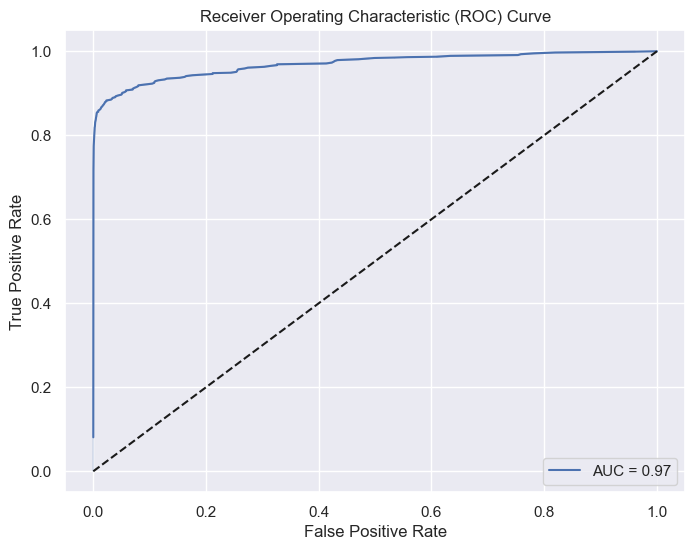

In [63]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classification
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [64]:
importances = lgbm_best.feature_importances_
feature_names= X.columns

for feature, importance in zip(feature_names, importances):
    print(f'{feature} : {importance}')

Type : 4616
Air_temperature_K : 15250
Process_temperature_K : 15204
Rotational_speed_rpm : 10823
Torque_Nm : 9428
Tool wear_min : 15525
TWF : 282
HDF : 269
PWF : 313
OSF : 277
RNF : 948


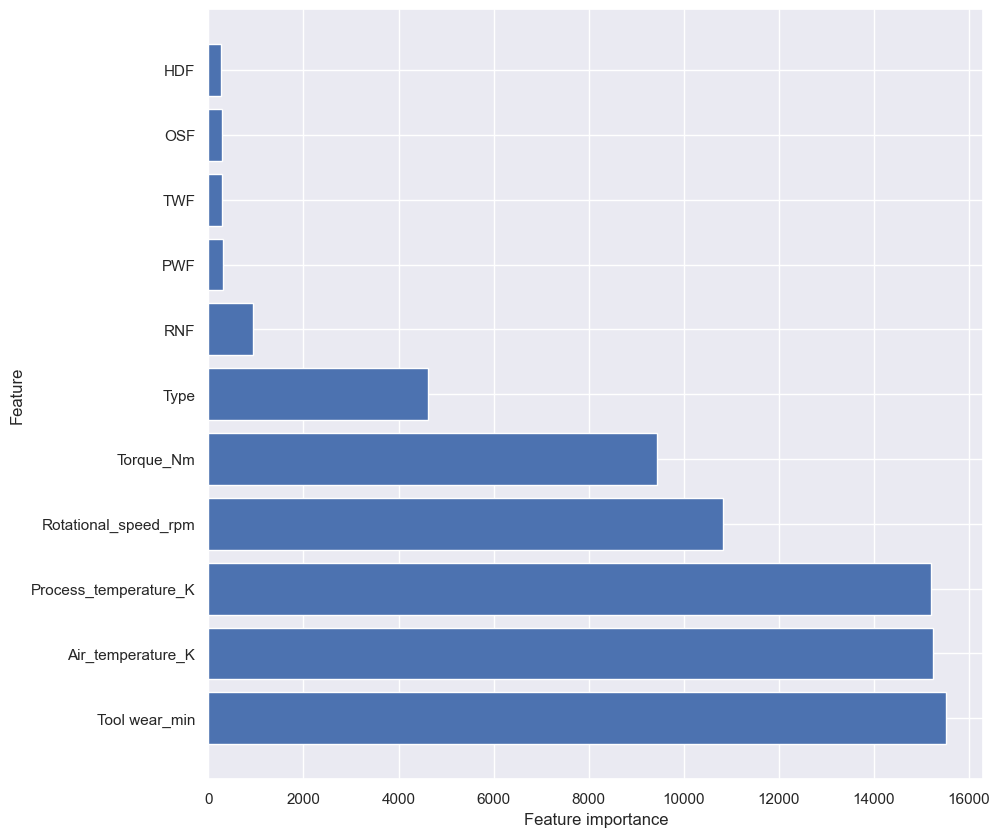

In [65]:
# Create a list of (feature, importance) tuples
feature_importances = [(feature, importance) for feature, importance in zip(feature_names, importances)]

# Sort the feature importances by importance
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Extract the feature names and importances
feature_names, importances = zip(*feature_importances)

# Plot the feature importances
plt.figure(figsize=(10,10))
plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

<h3><b>Applying the best config on the test dataset</b></h3>

In [66]:
test.head()

id Product ID  Type  Air_temperature_K  Process_temperature_K  \
0  136429     L50896     1              302.3                  311.5   
1  136430     L53866     1              301.7                  311.0   
2  136431     L50498     1              301.3                  310.4   
3  136432     M21232     2              300.1                  309.6   
4  136433     M19751     2              303.4                  312.3   

   Rotational_speed_rpm  Torque_Nm  Tool wear_min  TWF  HDF  PWF  OSF  RNF  
0                  1499       38.0             60    0    0    0    0    0  
1                  1713       28.8             17    0    0    0    0    0  
2                  1525       37.7             96    0    0    0    0    0  
3                  1479       47.6              5    0    0    0    0    0  
4                  1515       41.3            114    0    0    0    0    0

In [67]:
X_Test = test.drop(columns=["id", "Product ID"], axis=1)
X_Test.head()

Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
0     1              302.3                  311.5                  1499   
1     1              301.7                  311.0                  1713   
2     1              301.3                  310.4                  1525   
3     2              300.1                  309.6                  1479   
4     2              303.4                  312.3                  1515   

   Torque_Nm  Tool wear_min  TWF  HDF  PWF  OSF  RNF  
0       38.0             60    0    0    0    0    0  
1       28.8             17    0    0    0    0    0  
2       37.7             96    0    0    0    0    0  
3       47.6              5    0    0    0    0    0  
4       41.3            114    0    0    0    0    0

In [68]:
pred = automl.predict_proba(X_Test)[:, 1]
pred

array([0.00062865, 0.00791668, 0.00045859, ..., 0.00213141, 0.00052498,
       0.00109483])

In [69]:
output = pd.DataFrame({'id':test.id, 'Machine failure':pred})
output.to_csv('Machine_Failure.csv',index=False)
print("Your submission was successfully saved")

Your submission was successfully saved
